# Aplicações Topológicas no Estudo de Fronteiras de Pareto

A análise das fronteiras de Pareto pode ser enriquecida por uma perspectiva topológica, onde a **topologia de fronteiras de Pareto** é estudada para identificar a estrutura e as relações entre as soluções ótimas. A topologia fornece uma linguagem poderosa para descrever as propriedades de continuidade e conectividade das soluções, explorando, por exemplo, se as fronteiras de Pareto formam formas conectadas ou desconectadas e como essas fronteiras podem ser modeladas em espaços de alta dimensão.

Neste contexto, podemos utilizar ferramentas de **topologia algébrica** para estudar a estrutura dessas fronteiras, identificando conexões e pontos críticos em regiões do espaço de soluções. O uso de grafos para representar essas fronteiras torna-se uma abordagem útil, onde cada nó representa uma solução e as arestas entre os nós indicam a relação de dominância ou a proximidade topológica entre as soluções. Essa estrutura gráfica pode ser explorada para entender a conectividade e as propriedades das fronteiras de Pareto, além de permitir a identificação de clusters ou regiões do espaço de soluções com características similares.

## Construção de Grafos para Estudo de Fronteiras de Pareto

O código fornecido visa construir um **grafo de vizinhança** entre pontos de um conjunto de soluções, onde as arestas representam relações de não-dominância entre os pontos. Esse grafo é gerado a partir de um conjunto de pontos $P = \{p_1, p_2, \dots, p_n\}$, com a adição de arestas entre os pontos que não possuem interseções no espaço de soluções, determinado por um **ponto de referência** $r$. As arestas indicam soluções que são vizinhas na análise de Pareto, ou seja, soluções que podem ser comparadas diretamente em termos de dominância.

Além disso, a verificação de **interseções** entre os segmentos de reta conectando os pontos ajuda a identificar aquelas soluções que são separadas por outras, evitando a inclusão de soluções dominadas no grafo. Através desse grafo, é possível visualizar a conectividade das soluções, observar padrões de proximidade e até realizar uma análise mais profunda da forma das fronteiras de Pareto.

## Objetivo da Análise

O objetivo principal desta análise é compreender a **topologia das fronteiras de Pareto** através da representação gráfica de soluções ótimas, onde a conectividade dos pontos reflete a relação de não-dominância entre eles. A topologia desse grafo pode fornecer insights importantes sobre a distribuição das soluções, a existência de clusters de soluções eficientes e a forma da fronteira de Pareto. A exploração topológica desses grafos abre novas possibilidades para otimização em múltiplos critérios, permitindo não apenas encontrar soluções ótimas, mas também entender como essas soluções estão distribuídas no espaço de soluções e como elas podem ser acessadas de maneira eficiente.

Dessa forma, ao aplicar conceitos topológicos e gráficos à análise de fronteiras de Pareto, estamos desenvolvendo uma ferramenta poderosa para a exploração e compreensão de problemas complexos de otimização, com implicações que se estendem desde a engenharia até as ciências sociais e econômicas.

## Ideia para Construção do Grafo

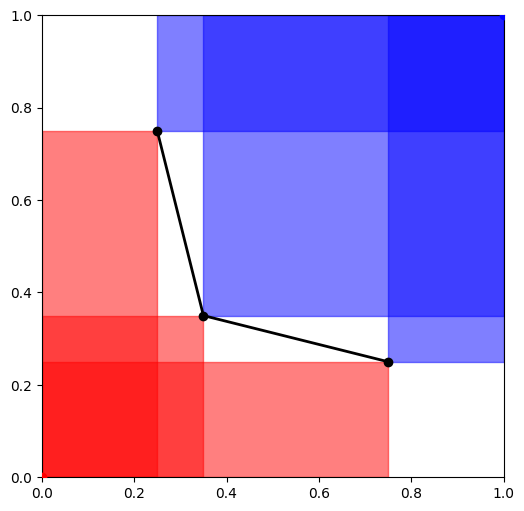

In [40]:
import matplotlib.pyplot as plt
import numpy as np

# Função para desenhar retângulos entre dois pontos
def draw_rectangle(ax, p1, p2, color):
    x_min = min(p1[0], p2[0])
    x_max = max(p1[0], p2[0])
    y_min = min(p1[1], p2[1])
    y_max = max(p1[1], p2[1])

    ax.fill_betweenx([y_min, y_max], x_min, x_max, color=color, alpha=0.5)

# Gerar pontos
p1, p2, p3 = np.array([
    [0.75, 0.25],
    [0.35, 0.35],
    [0.25, 0.75]
])

# Pontos de referência
p_ref1 = np.array([1, 1])
p_ref2 = np.array([0, 0])

# Criar figura e eixos
fig, ax = plt.subplots(figsize=(6, 6))

# Desenhar retângulos para (1,1)
draw_rectangle(ax, p1, p_ref1, color='blue')
draw_rectangle(ax, p2, p_ref1, color='blue')
draw_rectangle(ax, p3, p_ref1, color='blue')

# Desenhar retângulos para (-1,-1)
draw_rectangle(ax, p1, p_ref2, color='red')
draw_rectangle(ax, p2, p_ref2, color='red')
draw_rectangle(ax, p3, p_ref2, color='red')

# Plotar os pontos e os segmentos
ax.plot([p1[0], p2[0]], [p1[1], p2[1]], color='black', linewidth=2, label='Segmento 1-2')
ax.plot([p2[0], p3[0]], [p2[1], p3[1]], color='black', linewidth=2, label='Segmento 2-3')

ax.scatter(*p1, color='black', label='Ponto 1', zorder=5)
ax.scatter(*p2, color='black', label='Ponto 2', zorder=5)
ax.scatter(*p3, color='black', label='Ponto 3', zorder=5)
ax.scatter(*p_ref1, color='blue', label='Ponto (1,1)', zorder=5)
ax.scatter(*p_ref2, color='red', label='Ponto (-1,-1)', zorder=5)

# Configurar o plano
ax.axhline(0, color='gray', linewidth=0.5, linestyle='--')
ax.axvline(0, color='gray', linewidth=0.5, linestyle='--')
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_aspect('equal', adjustable='box')
plt.show()


## Verificação de Interseções
Para construção do grafo, precisamos analisar se duas soluções se conectam por um segmento de reta que não intersecte a região dominada. Existe uma maneira de abordar essa questão usando conceitos de geometria computacional e análise de interseção. Para o problema em questão, onde você tem um segmento de reta $[a,b]$ e um paralelepípedo $P = [p_1, r_1] \times \cdots \times [p_n, r_n]$ em $\mathbb{R}^n$, o teorema de separação de conjuntos convexos pode ser útil.

### Teorema de Separação de Conjuntos Convexos:
Este teorema afirma que, dado dois conjuntos convexos $A$ e $B$ em $\mathbb{R}^n$, se $A$ e $B$ são disjuntos, então existe um hiperplano que separa os dois conjuntos, isto é, existe um hiperplano $H$ tal que $A$ está de um lado de $H$ e $B$ está do outro.

Em seu caso:

- O segmento de reta $[a,b]$ é um conjunto convexo.
- O paralelepípedo $P$ também é um conjunto convexo, pois é um produto cartesiano de intervalos em $\mathbb{R}^n$.

Assim, se a interseção entre $[a,b]$ e $P$ for vazia, então, por este teorema, existe um hiperplano que separa $[a,b]$ e $P$.

### Estratégia de Verificação:
Para determinar se existe interseção entre $[a,b]$ e $P$, você pode utilizar uma abordagem baseada na **programação linear** para verificar se o segmento de reta $[a,b]$ intersecta $P$. Isso pode ser feito verificando as projeções do segmento de reta e dos intervalos dos eixos do paralelepípedo.

Aqui está uma estratégia mais prática:

1. **Projeção nas coordenadas de cada eixo**: Para cada coordenada $i$, projete o segmento de reta $[a,b]$ e as arestas de $P$ ao longo do eixo $i$. Ou seja, considere as projeções dos pontos $a$ e $b$ sobre o eixo $i$, e as projeções dos pontos $p_i$ e $r_i$ sobre o mesmo eixo.

2. **Verificação de sobreposição de intervalos**: Para cada eixo $i$, verifique se os intervalos projetados de $[a,b]$ e $P$ se sobrepõem. Se para **todos os eixos** a projeção de $[a,b]$ se sobrepõe à projeção de $P$, então há uma interseção.

3. **Condição de interseção**: Caso em algum eixo as projeções não se sobreponham, a interseção não ocorre. Caso contrário, se houver sobreposição em todos os eixos, então o segmento de reta $[a,b]$ intersecta o paralelepípedo $P$.

Essa abordagem pode ser formalizada como uma série de comparações entre os intervalos das projeções nas direções dos eixos. Em termos algébricos, para cada $i$, você verifica se:

$$
\max(p_i, r_i) \geq \min(a_i, b_i) \quad \text{e} \quad \min(p_i, r_i) \leq \max(a_i, b_i)
$$

Se isso for verdadeiro para todos os $i$, então o segmento $[a,b]$ intersecta o paralelepípedo $P$.

O código a seguir utiliza este teorema para verificar se um paralelepípedo determinado pelos pontos $p$ e $r$ é intersectado pelo segmento de reta que conecta os pontos $a$ e $b$.

In [26]:
def check_intersection(p, r, a, b):
    """
    Verifica se o segmento de reta aberto (a, b) intercepta o paralelepípedo P dado pelos pontos p e r.
    """
    for i in range(len(p)):
        # Projeção do paralelepípedo no eixo i
        min_p = min(p[i], r[i])
        max_p = max(p[i], r[i])
        
        # Projeção da reta no eixo i
        min_l = min(a[i], b[i])
        max_l = max(a[i], b[i])
        
        # Verifica se os intervalos se sobrepõem
        if max_p <= min_l or max_l <= min_p: # Modificar para < caso queira inserir os extremantes do segmento
            return False
    return True

### Funções auxiliares para plotagem de gráficos em 2D e 3D

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

def plot_3d_intersection(p, r, a, b, intersect):
    """
    Plota o paralelepípedo e o segmento de reta, e indica se houve interseção.
    """
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Paralelepípedo
    # Gerar as 8 coordenadas do paralelepípedo
    corners = np.array([[p[0], p[1], p[2]], [r[0], p[1], p[2]], [r[0], r[1], p[2]], [p[0], r[1], p[2]], 
                        [p[0], p[1], r[2]], [r[0], p[1], r[2]], [r[0], r[1], r[2]], [p[0], r[1], r[2]]])
    
    # Faces do paralelepípedo (pares de índices que formam as faces)
    faces = [[0,1,2,3], [4,5,6,7], [0,1,5,4], [2,3,7,6], [0,3,7,4], [1,2,6,5]]
    
    # Plot do paralelepípedo
    ax.add_collection3d(Poly3DCollection([corners[face] for face in faces], color='green', linewidths=1, edgecolors='r', alpha=0.25))
    
    # Reta
    ax.plot([a[0], b[0]], [a[1], b[1]], [a[2], b[2]], color='blue', linewidth=1)

    # Ajustes
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('Interseção' if intersect else 'Sem Interseção')
    plt.show()

In [28]:
def plot_2d_intersection(p, r, a, b, intersect):
    """
    Plota o paralelepípedo e o segmento de reta, e indica se houve interseção em R^2.
    """
    fig, ax = plt.subplots()

    # Paralelepípedo: Representado por um quadrado (retângulo) no plano R^2
    corners = np.array([[p[0], p[1]], [r[0], p[1]], [r[0], r[1]], [p[0], r[1]], [p[0], p[1]]])
    
    # Plot do paralelepípedo
    ax.plot(corners[:, 0], corners[:, 1], color='red', linewidth=2, label="Paralelepípedo", alpha=0.5)
    
    # Reta
    ax.plot([a[0], b[0]], [a[1], b[1]], color='blue', linewidth=2, label="Segmento")

    # Ajustes de plot
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title('Interseção' if intersect else 'Sem Interseção')
    ax.legend()
    plt.grid(True)
    plt.show()

### Exemplos de Verificação da Interseção

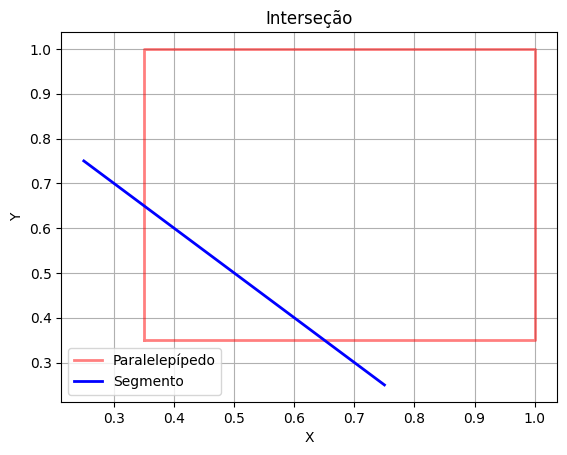

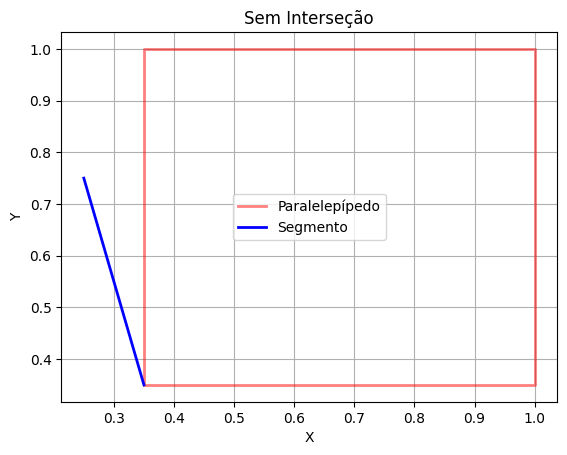

In [29]:
ex = np.array([
    [0.75, 0.25],
    [0.35, 0.35],
    [0.25, 0.75]
])
ref = [1, 1]

# Verifica se há interseção
intersect1 = check_intersection(ex[1], ref, ex[0], ex[2])
plot_2d_intersection(ex[1], ref, ex[0], ex[2], intersect1)

# Verifica se há interseção
intersect2 = check_intersection(ex[1], ref, ex[1], ex[2])
plot_2d_intersection(ex[1], ref, ex[1], ex[2], intersect2)

### Método de construção do Grafo

In [30]:
import networkx as nx

def build_graph(points: list[tuple], ref_point: tuple) -> nx.Graph:
    G = nx.Graph()

    # Adiciona os vértices
    for i, p in enumerate(points):
        G.add_node(i, point=p)
        
    for i, p in enumerate(points):
        for j, q in enumerate(points):
            if np.array_equal(p, q):
                continue
            add = True
            for k, r in enumerate(points):
                if np.array_equal(r, p) or np.array_equal(r, q):
                    continue
                if check_intersection(r, ref_point, p, q):
                    add = False
                    break
            if add:
                G.add_edge(i,j)
    return G           

### Exemplos de Construção do Grafo

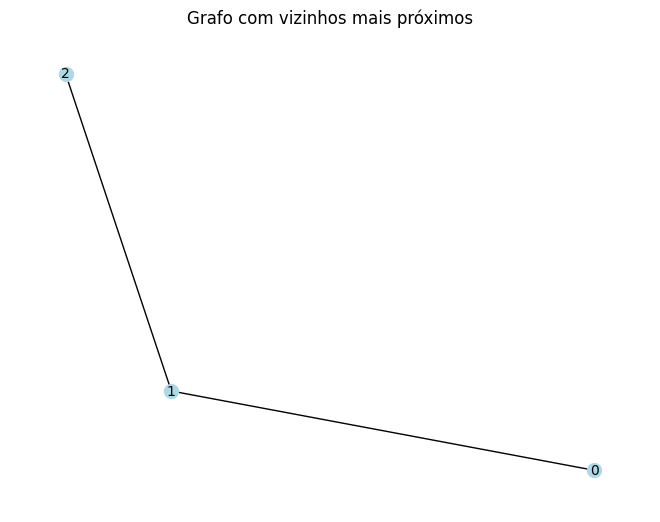

In [31]:
graph = build_graph(ex, ref)

# Exibir a posição dos pontos (nos do grafo)
pos = nx.get_node_attributes(graph, 'point')

# Visualizar o grafo
import matplotlib.pyplot as plt
nx.draw(graph, pos, with_labels=True, node_color='lightblue', node_size=100, font_size=10)
plt.title("Grafo com vizinhos mais próximos")
plt.show()     

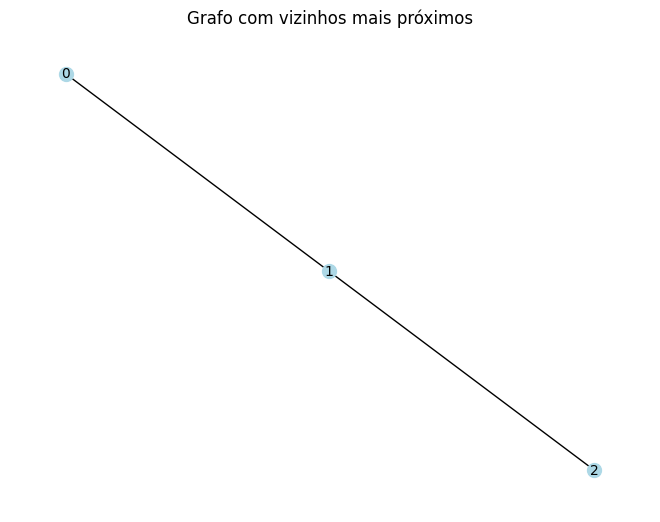

In [32]:
ex = np.array([
    [0.2, 0.8, 0.6],
    [0.5, 0.6, 0.4],
    [0.7, 0.3, 0.2]
])
ref = [1, 1, 1]

graph = build_graph(ex, ref)

# Exibir a posição dos pontos (nos do grafo)
pos = nx.spring_layout(graph)

# Visualizar o grafo
import matplotlib.pyplot as plt
nx.draw(graph, pos, with_labels=True, node_color='lightblue', node_size=100, font_size=10)
plt.title("Grafo com vizinhos mais próximos")
plt.show() 

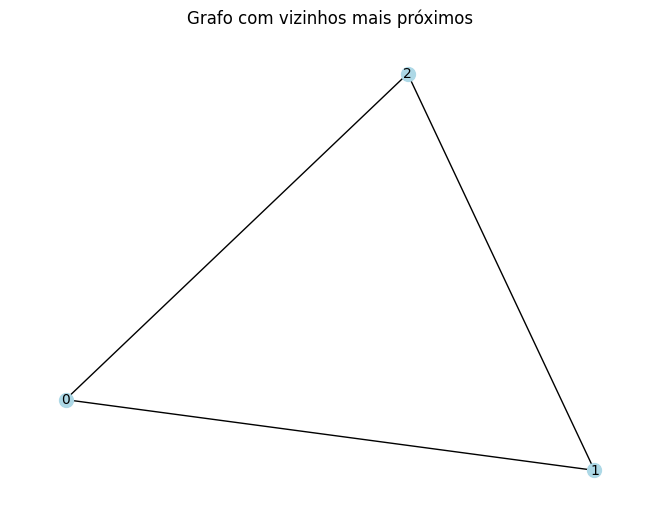

In [33]:
ex = np.array([
    [1, 0, 0],
    [0, 1, 0],
    [0, 0, 1]
])
ref = [1, 1, 1]

graph = build_graph(ex, ref)

# Exibir a posição dos pontos (nos do grafo)
pos = nx.spring_layout(graph)

# Visualizar o grafo
import matplotlib.pyplot as plt
nx.draw(graph, pos, with_labels=True, node_color='lightblue', node_size=100, font_size=10)
plt.title("Grafo com vizinhos mais próximos")
plt.show() 

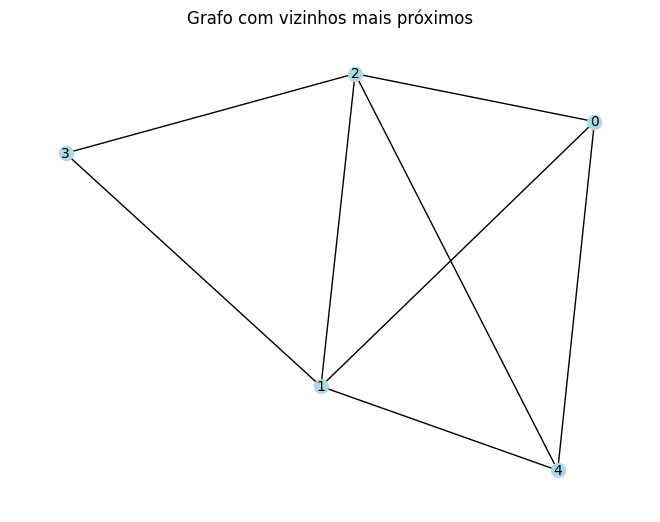

In [46]:
import numpy as np

def sample_from_simplex(n, num_points):
    r"""
    Gera pontos uniformemente distribuídos no simplexo padrão \Delta^n.
    
    Parâmetros:
        n (int): Dimensão do simplexo.
        num_points (int): Número de pontos a serem gerados.
    
    Retorna:
        np.ndarray: Array de forma (num_points, n), onde cada linha é um ponto no simplexo.
    """
    # Gera num_points amostras de tamanho n+1
    samples = np.random.exponential(scale=1.0, size=(num_points, n))
    # Normaliza para que a soma de cada linha seja 1
    simplex_points = samples / samples.sum(axis=1, keepdims=True)
    return simplex_points

ex = sample_from_simplex(4, 5)

ref = [1, 1, 1, 1]

graph = build_graph(ex, ref)

# Exibir a posição dos pontos (nos do grafo)
pos = nx.spring_layout(graph)

# Visualizar o grafo
import matplotlib.pyplot as plt
nx.draw(graph, pos, with_labels=True, node_color='lightblue', node_size=100, font_size=10)
plt.title("Grafo com vizinhos mais próximos")
plt.show() 